# Proyek Analisis Data: [Bike-sharing Dataset]
- **Nama:** Fadlur Rahman
- **Email:** digitalcipta262@gmail.com

## Menentukan Pertanyaan Bisnis

1. Bagaimana jumlah penyewaan sepeda berubah pada setiap musim selama tahun 2011 - 2012?
2. Bagaimana perbedaan pola penyewaan sepeda antara pengguna casual dan registered setiap bulan selama tahun 2012, dan strategi apa yang dirancang berdasarkan perbedaan pola tersebut?
3. Bagaimana pola penyewaan sepeda terhadap periode waktu selama tiga bulan terakhir, dan periode waktu manakah yang konsisten menunjukkan permintaan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [8]:
day = pd.read_csv("Submission/data/day.csv")
hour = pd.read_csv("Submission/data/hour.csv")

**Insight:**
- Mengumpulkan data day
- Mengumpulkan data hour

### Assessing Data

In [9]:
# MENILAI DATA DAY
day.duplicated().sum()
day.isnull().sum()
day.info()
day.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- 0 data duplikat
- 0 data missing value
- kolom "dteday" harus bertipe time-series bukan object
- kolom "holiday" pada baris maks, harus bernilai 0 bukan 1
- kolom "casual", terdapat outlier data

In [10]:
# MENILAI DATA HOUR
hour.duplicated().sum()
hour.isnull().sum()
hour.info()
hour.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- 0 data duplikat
- 0 data missing value
- kolom "dteday" harus bertipe time-series bukan object
- kolom "holiday" pada baris max bernilai 1, seharusnya bernilai 0
- kolom "casual", terdapat outlier data
- kolom "registered", terdapat outlier data

### Cleaning Data

In [11]:
# CLEANING DATA DAY

''' Mengatasi tipe data pada kolom dteday'''
day["dteday"] = pd.to_datetime(day["dteday"])

''' Mengatasi invalid value pada kolom holiday'''
day.holiday.replace(1, 0, inplace=True)

''' Mengatasi outlier data pada kolom casual'''
Q1_casual_day = np.percentile(day["casual"], 25)
Q3_casual_day = np.percentile(day["casual"], 75)
IQR_casual_day = Q3_casual_day - Q1_casual_day
minimum_casual_day, maximum_casual_day = Q1_casual_day - (1.5 * IQR_casual_day), Q3_casual_day + (1.5 * IQR_casual_day)
kondisi_bawah_day = day["casual"] < minimum_casual_day
kondisi_atas_day = day["casual"] > maximum_casual_day
day.drop(day[kondisi_bawah_day].index, inplace=True)
day.drop(day[kondisi_atas_day].index, inplace=True)



C:\Users\dell\AppData\Local\Temp\ipykernel_12628\1904065561.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day.holiday.replace(1, 0, inplace=True)


**Insight:**
- Mengubah tipe data "objek" menjadi "time-series" pada kolom dteday
- Mengubah kesalahan input data bernilai 1 menjadi 0
- Menghapus baris data yang termasuk ke dalam kategori "outlier data" pada kolom casual

In [12]:
# CLEANING DATA HOUR

''' Mengatasi tipe data pada kolom dteday'''
hour["dteday"] = pd.to_datetime(hour["dteday"])

''' Mengatasi invalid value pada kolom holiday'''
hour.holiday.replace(1, 0, inplace=True)

'''Mengatasi outlier data pada kolom casual'''
Q1_casual_hour = np.percentile(hour["casual"], 25)
Q3_casual_hour = np.percentile(hour["casual"], 75)
IQR_casual_hour = Q3_casual_hour - Q1_casual_hour
minimum_casual_hour, maximum_casual_hour = Q1_casual_hour - (1.5 * IQR_casual_hour), Q3_casual_hour + (1.5 * IQR_casual_hour)
kondisi_bawah_casual_hour = hour["casual"] < minimum_casual_hour
kondisi_atas_casual_hour = hour["casual"] > maximum_casual_hour
hour.drop(hour[kondisi_bawah_casual_hour].index, inplace=True)
hour.drop(hour[kondisi_atas_casual_hour].index, inplace=True)

''' Mengatasi outlier data pada kolom registered'''
Q1_registered_hour = np.percentile(hour["registered"], 25)
Q3_registered_hour = np.percentile(hour["registered"], 75)
IQR_registered_hour = Q3_registered_hour - Q1_registered_hour
minimum_registered_hour, maximum_registered_hour = Q1_registered_hour - (1.5*IQR_registered_hour), Q3_registered_hour + (1.5 * IQR_registered_hour)
kondisi_bawah_registered_hour = hour["registered"] < minimum_registered_hour
kondisi_atas_registered_hour = hour["registered"] > maximum_registered_hour
hour.drop(hour[kondisi_bawah_registered_hour].index, inplace=True)
hour.drop(hour[kondisi_atas_registered_hour].index, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_12628\3754666670.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour.holiday.replace(1, 0, inplace=True)


**Insight:**
- Mengubah tipe data "objek" menjadi "time-series" pada kolom dteday
- Mengubah kesalahan input data bernilai 1 menjadi 0
- Menghapus seluruh baris yang mengandung data outlier pada kolom "casual"
- Menghapus seluruh baris yang mengandung data outlier pada kolom registered

## Exploratory Data Analysis (EDA)

### Explore Data "Day"

In [13]:
''' Mengubah numerik pada season menjadi object'''
season = ["Springer", "Summer", "Fall", "Winter"]
for i in range (4):
    day["season"] = day["season"].replace(i+1, season[i])


''' Memfilter dataset day sehingga mendapatkan data tahun 2011 dan 2012'''
in_2011 = day[day["yr"] == 0]
in_2012 = day[day["yr"] == 1]


''' Mendapatkan jumlah penyewaan setiap musim selama tahun 2011 - 2012'''
pivot_by_season_2011 = in_2011.groupby(by="season").agg({
    "cnt" : "sum"
})
pivot_by_season_2012 = in_2012.groupby(by="season").agg({
    "cnt" : "sum"
})


''' Mendapatkan jumlah rental casual vs registered untuk tiap bulan dan mengubah numerik bulan menjadi objek'''
pivot_2012 = in_2012.groupby(by="mnth").agg({
    "casual" : "sum",
    "registered" : "sum"
})
pivot_2012.index = pivot_2012.index.map({
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "Oktober", 11: "November", 12: "December" 
})

by_month = in_2011.groupby(by="mnth").agg({
    "cnt" : "sum"
})



**Insight:**
1. Memfilter data 2011 dan 2012 lalu membuat pivot table berdasarkan "season" untuk tahun 2011 dan 2012 untuk menjawab pertanyaan 1
2. Membuat pivot table berdasarkan "mnth" untuk mendapatkan data casual dan registered untuk menjawab pertanyaan 2

### Explore Data "hour"

In [14]:
''' Membuat kategori baru'''
def category(hour):
    if 0 <= hour <= 5:
        return "Early Days"
    elif 6 <= hour <= 10:
        return "Morning"
    elif 11 <= hour <= 14:
        return "Midday"
    elif 15 <= hour <= 18:
        return "Afternoon"
    else:
        return "Evening"
hour["time_of_day"] = hour["hr"].apply(category)


''' Memfilter untuk 3 bulan terakhir'''
oktober_2012 = hour.loc[(hour["yr"] == 1) & (hour["mnth"] == 10)]
november_2012 = hour.loc[(hour["yr"] == 1) & (hour["mnth"] == 11)]
desember_2012 = hour.loc[(hour["yr"] == 1) & (hour["mnth"] == 12)]

pivot_oktober_2012 = oktober_2012.groupby(by="time_of_day").agg({
    "cnt" : "sum"
})

pivot_november_2012 = november_2012.groupby(by="time_of_day").agg({
    "cnt" : "sum"
})
pivot_desember_2012 = desember_2012.groupby(by="time_of_day").agg({
    "cnt" : "sum"
})



**Insight:**
- Kita memperoleh data tahun 2012 dan bulan terakhir pada dataset "hour" dan mengkategorikan jam tertentu sebagai dini hari, pagi hari, siang hari, sore hari, dan malam hari untuk menjawab pertanyaan 3

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah penyewaan sepeda berubah pada setiap musim selama tahun 2011 - 2012?

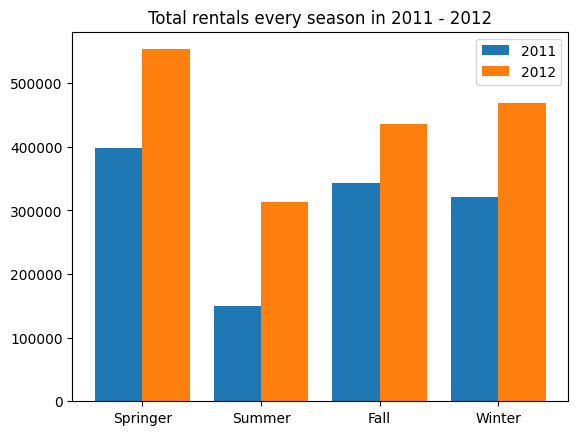

In [15]:
# Musim pada tahun 2011
cnt_2011 = []
for i in range(4):
    total_cnt_2011 = pivot_by_season_2011.iloc[i, 0]
    cnt_2011.append(total_cnt_2011)

# Musim pada tahun 2012
cnt_2012 = []
for i in range (4):
    total_cnt_2012 = pivot_by_season_2012.iloc[i, 0]
    cnt_2012.append(total_cnt_2012)

# Plot grafik
x = np.arange(len(season))
width = 0.4
plt.bar(x - width/2, cnt_2011, width=width, label="2011")
plt.bar(x + width/2, cnt_2012, width=width, label="2012")
plt.xticks(x, season)
plt.legend()
plt.title("Total rentals every season in 2011 - 2012")
plt.show()

### Pertanyaan 2: Bagaimana perbedaan pola penyewaan sepeda antara pengguna casual dan registered setiap bulan selama tahun 2012, dan strategi apa yang dirancang berdasarkan perbedaan pola tersebut?

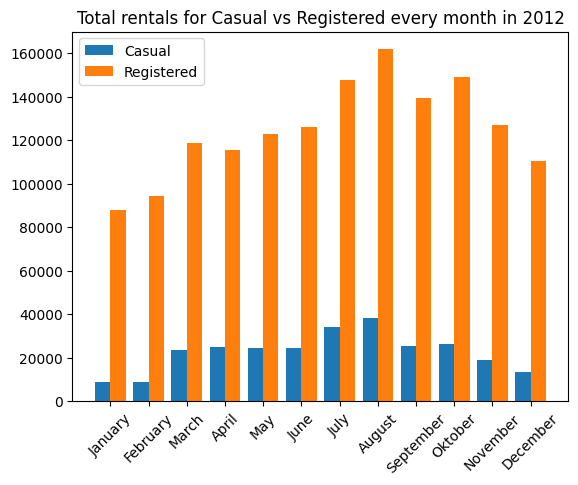

In [16]:
casual = []
registered = []
month = pivot_2012.index.values
for i in range(12):
    total_casual = pivot_2012.iloc[i, 0]
    total_registered = pivot_2012.iloc[i, 1]
    casual.append(total_casual)
    registered.append(total_registered)
x = np.arange(len(month))
width = 0.4
plt.bar(x - width/2, casual, width=width, label="Casual")
plt.bar(x + width/2, registered, width=width, label="Registered")
plt.xticks(x, month, rotation=45)
plt.legend()
plt.title("Total rentals for Casual vs Registered every month in 2012")
plt.show()

### Pertanyaan 3: Bagaimana pola penyewaan sepeda terhadap periode waktu selama tiga bulan terakhir, dan periode waktu manakah yang konsisten menunjukkan permintaan tertinggi?

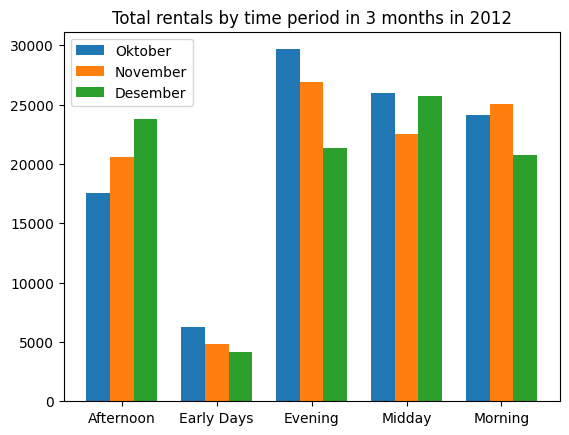

In [17]:
time_of_day = pivot_oktober_2012.index.values
cnt_oktober_2012 = []
cnt_november_2012 = []
cnt_desember_2012 = []
for i in range(5):
    total_cnt_oktober = pivot_oktober_2012.iloc[i, 0]
    total_cnt_november = pivot_november_2012.iloc[i, 0]
    total_cnt_desember = pivot_desember_2012.iloc[i, 0]
    cnt_oktober_2012.append(total_cnt_oktober)
    cnt_november_2012.append(total_cnt_november)
    cnt_desember_2012.append(total_cnt_desember)

x = np.arange(len(time_of_day))
width = 0.25
plt.bar(x - width, cnt_oktober_2012, width=width, label="Oktober")
plt.bar(x, cnt_november_2012, width=width, label="November")
plt.bar(x + width, cnt_desember_2012, width=width, label="Desember")
plt.xticks(x, time_of_day)
plt.legend()
plt.title("Total rentals by time period in 3 months in 2012")
plt.show() 

# Insight
**Grafik 1 : Total rentals every season in 2011-2012**
- Kenaikan signifikan dari 2011 ke 2012 di semua musim → tren bisnis sangat positif.

- Springer (musim semi) jadi puncak tertinggi, bahkan melampaui Fall & Winter → kemungkinan pengaruh cuaca nyaman untuk bersepeda.

- Summer (musim panas) tetap paling rendah meskipun meningkat → ini adalah titik lemah yang perlu diperhatikan.

- Winter & Fall menunjukkan pertumbuhan sehat, cukup stabil mendukung revenue sepanjang tahun.

**Grafik 2 : Total rentals for Casual Vs Registered every months in 2012**
- Registered users mendominasi → menjadi pilar utama bisnis. Mereka konsisten tinggi di semua bulan, walaupun ada fluktuasi.

- Casual users relatif kecil, tetapi terlihat meningkat di musim panas (Juli–Agustus) → kemungkinan dipengaruhi faktor liburan & wisata.

- Registered puncak di Agustus–September → mendukung asumsi bahwa akhir musim panas & awal gugur adalah waktu paling sibuk.

- Casual cenderung turun di akhir tahun (Nov–Des) → mungkin karena cuaca dingin & aktivitas outdoor berkurang.

**Grafik 3 : Total rentals by time period in 3 months in 2012**
- Evening memiliki jumlah penyewaan tertinggi dibanding periode waktu lainnya, terutama di bulan Oktober. Early Days (dini hari) konsisten menjadi periode dengan jumlah penyewaan paling rendah setiap bulan.

- Oktober menonjol di periode Evening, paling tinggi dibanding bulan lain. November cenderung stabil di semua waktu (Afternoon, Evening, Morning) tapi lebih rendah di Midday. Desember tinggi di Afternoon dan Midday, tetapi rendah di Morning dan terutama di Evening (paling rendah di antara ketiga bulan).

- Waktu favorit pengguna untuk rental adalah Evening dan Midday. Ada pergeseran tren: di Desember pengguna lebih banyak menyewa di Afternoon, sementara penggunaan Evening menurun dibanding Oktober–November. Aktivitas paling sepi selalu di Early Days, tanpa banyak variasi.

# Penggabungan dataset menjadi all_df

In [18]:
all_df = pd.merge(
    left=hour,
    right=day,
    on='dteday',
    how='left',
    suffixes=('_hour', '_day') 
)

## Conclusion

**Conclusion Pertanyaan 1**
- Ada peningkatan minat pelangaan dari tahun ke tahun di semua musim
- musim "summer" menjadi titik lemah tiap tahun dengan jumlah penyewaan paling sedikit yang berpotensi bermasalah pada perusahaan
- Secara umum, perusahaan berada di jalur pertumbuhan sehat, namun perlu strategi khusus agar permintaan lebih merata sepanjang musim

**Conclusion Pertanyaan 2**
- Perusahaan sudah punya basis pelanggan setia (registered) yang kuat dan stabil, walaupun fluktuatif, sehingga ini bisa menjadi pilar utama bisnis
- Casual punya kontribusi kecil tapi bisa menjadi peluang pertumbuhan, karena mereka berpotensi dikonversi menjadi pelanggan setia

**Conclusion Pertanyaan 3**
- Pola rental dipengaruhi oleh jam aktivitas masyarakat
- Evening dan Midday adalah waktu paling sibuk untuk merental sepeda, perusahaan harus berfokus menyediakan sepeda maksimal di jam-jam ini
- Desember mempunyai pola yang unik, rental pagi menurun, sedangkan rental sore naik. Kemungkinan pengaruh musim liburan